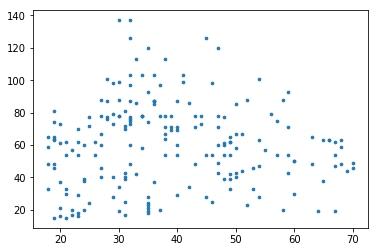

Randomly chosen centroids
[[ 37.46993   19.749537]
 [ 55.540657 130.5913  ]
 [ 65.00098   63.18394 ]
 [ 26.773455  45.307266]
 [ 64.80155   79.31564 ]]


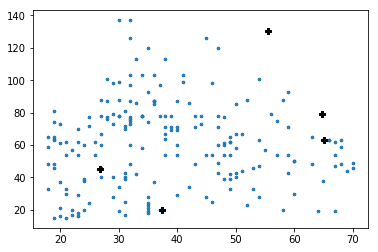

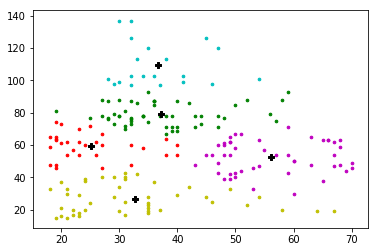

In [2]:
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt
%matplotlib inline



#Plots:
#1. All points
#2. All points and randomly chosen centroids
#3. All points but clustered, as visible by colors

X = pd.read_csv("Mall_Customers.csv")

def euclidean(a, b, ax):
    dis = np.linalg.norm(a - b, axis=ax)
    return dis

category = 'Age' #This can be anything :v Basically the x val
x1 = X[category].values
x2 = X['Annual Income (k$)'].values #this is target so doesnt change :v Basically y val
plt.scatter(x1, x2, s=7)
plt.show()

k = 5 #This can be anything too. Youre supposed to use elbow method -->
#--> to find it. but thats beyond the scope of this problem :v
# also if you make this more than 5 add more colors to variable 'colors'

C1 = np.random.uniform(np.min(x1), np.max(x1), size=k)
C2 = np.random.uniform(np.min(x2), np.max(x2), size=k)
C = np.array(list(zip(C1, C2)), dtype=np.float32)

print("Randomly chosen centroids\n"+str(C))
plt.scatter(x1, x2, s=7)
plt.scatter(C1, C2, marker='P', c='k')
plt.show()

C_prev = np.zeros(C.shape)
labels = np.zeros(len(X)) #cluster labels
E = euclidean(C, C_prev, None)

while E != 0:
    for i in range(len(X)):
        distances = euclidean((x1[i],x2[i]), C, 1)
        cluster = np.argmin(distances)
        labels[i] = cluster
    C_prev = deepcopy(C)
    for i in range(k):
        points = []
        for j in range(len(X)):
            if labels[j] == i:
                points.append((x1[j],x2[j]))
        points = np.array(points)
        C[i] = np.mean(points, axis=0)
    E = euclidean(C, C_prev, None)

colors = ['y', 'c', 'm', 'r', 'g', 'b']
for i in range(k):
    points = []
    for j in range(len(X)):
        if labels[j] == i:
            points.append((x1[j],x2[j]))
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
plt.scatter(C[:, 0], C[:, 1], marker='P', c='k')
plt.show()